# Guided Programming 2 - Solving a Simultaneous Equation

**Mathematical Methods for Chemical Engineers (MTHS1008)**

**Dr Matthew Scase**

We are going to solve the simultaneous equations

\begin{equation*} 
\left\{\begin{array}{lcl} 3x_1 + 4x_2 &=& 2 \\ \phantom{3}x_1 + 2x_2 &=& 0 \end{array}\right.
\label{eq:system} \tag{1}
\end{equation*}

We will 

- Input the two equations
- Plot the lines that the two equations represent
- Solve the equations
- Plot the solution

## Setting up the system to be solved

We will want our code to be able to solve for the general simultaneous equation case

\begin{equation*}
\left\{\begin{array}{lcl} ax_1 + bx_2 &=& u \\ cx_1 + dx_2 &=& v \end{array}\right.
\end{equation*}

Hence, we will write our code to work for general input coefficients $a$, $b$, $c$, and $d$ and a general right-hand side $u$ and $v$.

To get started however we will work with the specific equation given above in \eqref{eq:system}.  To enter the first equation in \eqref{eq:system} we therefore require $a = 3$, $b = 4$, and $u = 2$.

In [1]:
# INPUT EQUATION 3 x_1 + 4 x_2 = 2 
a = 3
b = 4
u = 2

To enter the second equation in system (1) we need to take $c = 1$, $d = 2$, and $v = 0$.

In [2]:
# INPUT EQUATION   x_1 + 2 x_2 = 0 
c = 1
d = 2
v = 0

## Plotting our equations

To plot these two equations we choose a horizontal range, say $0 \leqslant x_1 \leqslant 4$, and can find the corresponding values of $x_2$ by rearranging our general equations.  For the first equation
\begin{equation*}
ax_1 + bx_2 = u \quad\Rightarrow\quad x_2 = \frac{u - ax_1}{b}.
\tag{2}
\end{equation*}
[We can observe that this is a straight line as it is in the form $y = mx + c$ where the gradient of our straight line is given by $m = -a/b$ and the intercept at $x=0$ is given by $y = u/b$.]

For the second equation
\begin{equation*}
cx_1 + dx_2 = v \quad\Rightarrow\quad x_2 = \frac{u - cx_1}{d}.
\tag{3}
\end{equation*}

As we wish to plot some lines we need to import the `matplotlib.pyplot` Python plotting tools.  To save ourselves typing out `matplotlib.pyplot.plot( ... ` each time we will import the module `as plt`.

In [3]:
import matplotlib.pyplot as plt

There are many ways to plot a straight line in Python.  One method is to specify two points in the $(x, y)$ plane and get Python to plot the two points connected by a straight line.  This is what we will do here.

We would like the horizontal range to be $0 \leqslant x \leqslant 4$ and we can set this $x$-axis scale of the plot using

    x1Range = [0, 4]
    
This defines a variable called `x1Range` that is a **list** that contains two entries.  `x1Range[0]` contains the $x$-coordinate of the first point defining our line.  `x1Range[1]` contains the $x$-coordinate of the second point defining our line.

We now need to set the two $y$-coordinates that correspond to these two $x$-coordinates.  One way to do this is using a **list comprehension**.  For our first equation we know that given an $x$ value, $x_1$, we have a corresponding $y$ value, $x_2$, given by (2).  So we write

    x2Range = [(u - a*x)/b for x in x1Range]
    
Here Python works through every value of `x` that it finds in the list `x1Range`, calculates the new number $(u - ax)/b$ for that value of `x`, and then adds the new number to the list `x2Range`.

In [4]:
x1Range = [0, 4]
x2Range = [(u - a*x)/b for x in x1Range]
print('x1Range =', x1Range)
print('x2Range =', x2Range)

x1Range = [0, 4]
x2Range = [0.5, -2.5]


We see that x2Range is a list containing the two $y$-coordinate points that correspond to the two $x$-coordinate points in x1Range.  We can now plot the line representing the first equation using the `plt.plot` command.  The format is

    plt.plot(x-coordinates, y-coordinates, plotting format)
    
If we want Python to join our points together with a straight line we use the plotting format `'-'`.  Other plotting styles are also available, e.g., `'o'`, `'--'`.  

To plot our first equation therefore we use

    plt.plot(x1Range, x2Range, '-')

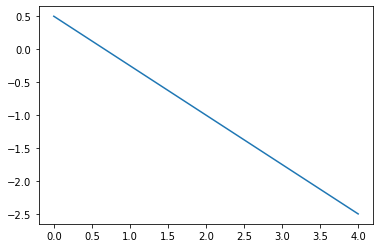

In [5]:
plt.plot(x1Range, x2Range, '-');

Python has plotted a straight line connecting the first point $(0, 0.5)$ to the second point $(4, -2.5)$ which corresponds to our equation $3x_1 + 4x_2 = 2$.  Everywhere on this line this equation is true.

Let us plot both equations and label our axis using the

    plt.xlabel('x label text')
    plt.ylabel('y label text')
    
commands.

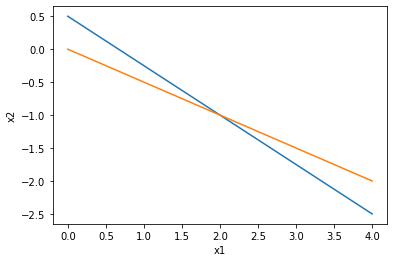

In [6]:
# Set Range for plotting
x1Range = [0, 4]
# ........... Plot First equation (blue)
x2Range = [(u - a*x)/b for x in x1Range]
plt.plot(x1Range, x2Range, '-') 
# ........ Plot Second equation (orange)
x2Range = [(v - c*x)/d for x in x1Range]
plt.plot(x1Range, x2Range, '-') 
# ........................... Label axes
plt.xlabel('x1'); 
plt.ylabel('x2');

The blue line connects the two points $(0, 0.5)$ and $(4, -2.5)$ which corresponds to our equation $3x_1 + 4x_2 = 2$.  The orange line connects the two points $(0, 0)$ and $(4, -2)$ which corresponds to our equation $x_1 + 2x_2 = 0$.  

The values of $x_1$ and $x_2$ at the special point where the two lines cross make both of our equations true at the same time, i.e., *simultaneously*.

## Solving our system of equations

Next, we need to calculate the solution of our simultaneous equations and plot and print out our solution.

Working in the general case again, we can begin by multiplying the first equation through by $d$ and the second equation through by $b$ to get

\begin{equation*}
\left\{\begin{array}{lcl} adx_1 + bdx_2 &=& du \\ bcx_1 + bdx_2 &=& bv \end{array}\right.
\end{equation*}

Subtracting the lower equation from the upper equation we find

\begin{equation*}
\left(ad - bc\right)x_1 = du - bv.
\end{equation*}

Assuming that $ad-bc\ne0$ we therefore have that

\begin{equation*}
x_1 = \frac{du - bv}{ad - bc}.
\label{eq:x1sol} \tag{4}
\end{equation*}

Alternatively we could have multiplied the first equation through by $c$ and the second equation through by $a$ to get

\begin{equation*}
\left\{\begin{array}{lcl} acx_1 + bcx_2 &=& cu \\ acx_1 + adx_2 &=& av \end{array}\right.
\end{equation*}

This time we subtract the upper equation from the lower equation to find

\begin{equation*}
\left(ad - bc\right)x_2 = av - cu.
\end{equation*}

Again, assuming that $ad-bc\ne0$ we therefore have that

\begin{equation*}
x_2 = \frac{av - cu}{ad - bc}.
\label{eq:x2sol} \tag{5}
\end{equation*}

We can now evaluate our solution in Python using \eqref{eq:x1sol} and \eqref{eq:x2sol}.  We will store our solution in the variables `x1` and `x2` and then print out our solution.

In [7]:
# CALCULATE SOLUTION
x1 = (d*u - b*v)/(a*d - b*c)
x2 = (a*v - c*u)/(a*d - b*c)
print('Solution: x1 =', x1, ', x2 =', x2)

Solution: x1 = 2.0 , x2 = -1.0


Finally we plot our solution and observe that it is the unique point that lies on both lines representing equations 1 and 2, *i.e.*, the solution lies at the intersection of the two lines.

To plot the single point $(x_1, x_2)$ as a round data point we can use the plotting format `'o'`

    plt.plot(x1, x2, 'o')
    
The colours that have been chosen for our two equations and the solution are selected automatically.  We can force Python to choose colours of our specification if we wish.

Finally we need to provide a key or `legend` for the different elements of our plot.  We can use the `plt.legend` command which requires a list of text strings that correspond to the plotted elements in the order in which we plotted them.  In this case therefore we use

    plt.legend(['Equation 1', 'Equation 2', 'Solution'])

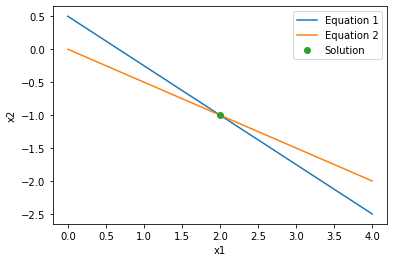

In [8]:
# Set Range for plotting
x1Range = [0, 4]
# ........... Plot First equation (blue)
x2Range = [(u - a*x)/b for x in x1Range]
plt.plot(x1Range, x2Range, '-') 
# ........ Plot Second equation (orange)
x2Range = [(v - c*x)/d for x in x1Range]
plt.plot(x1Range, x2Range, '-') 
# ................ Plot Solution (green)
plt.plot(x1, x2, 'o') 
# ........................... Label axes
plt.xlabel('x1') 
plt.ylabel('x2')
plt.legend(['Equation 1', 'Equation 2', 'Solution']);

## Exercises

- Modify the code so that the user can input their equations without having to change the program.  You can do this using the
        
        variable = float(input('Text Prompt'))
        
    command.
- Make sure the code never accidentally divides through by zero.  Force the code to exit gracefully explaining to the user why a solution has not been calculated.
    Remember, we can test to see if something is not equal to something else using the `A != B` expression which reads as 'A is not equal to B'.  For example
    
        if A != B:
            Do something when A is not equal to B
        else:
            Do something different when A is equal to B

## Example Script

Allows the user to input all coefficients and prevents accidental division by zero.

In [ ]:
import matplotlib.pyplot as plt

# INPUT FIRST EQUATION
print('ENTER FIRST EQUATION')
a = float(input('Coefficient of x1: a = '))
b = float(input('Coefficient of x2: b = '))
u = float(input('  Right hand side: u = '))

# INPUT SECOND EQUATION
print('\nENTER SECOND EQUATION')
c = float(input('Coefficient of x1: c = '))
d = float(input('Coefficient of x2: d = '))
v = float(input('  Right hand side: v = '))

print('\nSYSTEM\n First equation:', a, 'x1 +', b, 'x2 =', u)
print('Second equation:', c, 'x1 +', d, 'x2 =', v)

den = a*d - b*c # .. Calculate denominator ad - bc

if den != 0: # ... Ensure we do not divide by zero
    # ......................... CALCULATE SOLUTION
    x1 = (d*u - b*v)/den
    x2 = (a*v - c*u)/den
    print('\nSOLUTION\nx1 =', x1, ', x2 =', x2)
    
    # ..................... Set Range for plotting
    x1Range = [x1 - 2, x1 + 2]
    # ................. Plot First equation (blue)
    x2Range = [(u - a*x)/b for x in x1Range]
    plt.plot(x1Range, x2Range, '-') 
    # .............. Plot Second equation (orange)
    x2Range = [(v - c*x)/d for x in x1Range]
    plt.plot(x1Range, x2Range, '-') 
    # ...................... Plot Solution (green)
    plt.plot(x1, x2, 'o') 
    # ................................. Label axes
    plt.xlabel('x1') 
    plt.ylabel('x2')
    plt.legend(['Equation 1', 'Equation 2', 'Solution']);
else:
    print('\nNo unique solution')

ENTER FIRST EQUATION
